In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

%matplotlib inline
pd.set_option('display.max_columns', 100)

## 1. Import Data Frame

In [2]:
rawdata = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
rawdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
# check null values
rawdata.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Nan Values in the dataset. Then, let's move to the next steps!

## 2. Drop Unnecessary Column

In [5]:
data = rawdata.drop(['customerID'], axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The customer ID seems not important for processing the data, so, for now, we can ignore this by dropping the column.

## 3. Convert Categorical Data to Numerical

### 3.1. Conver Yes/No Questions to Numerical

In [6]:
def yesno_conv(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [7]:
lst = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for x in lst:
    data[x] = data[x].apply(yesno_conv)

In [8]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


### 3.2. Convert another categorical data with get_dummies

#### 3.2.1. Gender

In [9]:
gend = pd.get_dummies(data['gender'])
gend.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


#### 3.2.2. Internet Services

In [10]:
intsv = pd.get_dummies(data['InternetService'])
intsv.head()

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [11]:
intsv.columns = ['DSL', 'FiberOptic', 'NoIntServ']

intsv.head()

,DSL,FiberOptic,NoIntServ
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


#### 3.2.3. Contract

In [12]:
cont = pd.get_dummies(data['Contract'])
cont.head()

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


#### 3.2.4. Payment Method

In [13]:
pay = pd.get_dummies(data['PaymentMethod'])
pay.head()

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [14]:
df = pd.concat([gend, intsv, cont, pay, data], axis=1)
df.drop(["gender", "InternetService", "Contract", "PaymentMethod"], axis=1, inplace= True)
df

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0
2,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.5,0
7039,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.9,0
7040,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0
7041,0,1,0,1,0,1,0,0,0,0,0,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.6,1


## 4. Convert Object into Float 

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.dtypes)

Female                         uint8
Male                           uint8
DSL                            uint8
FiberOptic                     uint8
NoIntServ                      uint8
Month-to-month                 uint8
One year                       uint8
Two year                       uint8
Bank transfer (automatic)      uint8
Credit card (automatic)        uint8
Electronic check               uint8
Mailed check                   uint8
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
MultipleLines                  int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
PaperlessBilling               int64
MonthlyCharges               float64
TotalCharges                 float64
C

## 5. Data Description for Preprocessed Data

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Female,7043.0,0.495244,0.500013,0.00,0.00,0.000,1.0000,1.00
Male,7043.0,0.504756,0.500013,0.00,0.00,1.000,1.0000,1.00
DSL,7043.0,0.343746,0.474991,0.00,0.00,0.000,1.0000,1.00
FiberOptic,7043.0,0.439585,0.496372,0.00,0.00,0.000,1.0000,1.00
NoIntServ,7043.0,0.216669,0.412004,0.00,0.00,0.000,0.0000,1.00
Month-to-month,7043.0,0.550192,0.497510,0.00,0.00,1.000,1.0000,1.00
One year,7043.0,0.209144,0.406726,0.00,0.00,0.000,0.0000,1.00
Two year,7043.0,0.240664,0.427517,0.00,0.00,0.000,0.0000,1.00
Bank transfer (automatic),7043.0,0.219225,0.413751,0.00,0.00,0.000,0.0000,1.00
Credit card (automatic),7043.0,0.216101,0.411613,0.00,0.00,0.000,0.0000,1.00


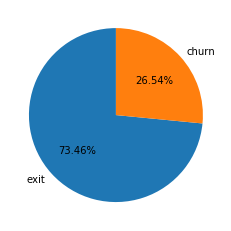

In [17]:
piedata = [len(df[df['Churn']==0]), len(df[df['Churn']==1])]
labels = ['exit', 'churn']

plt.pie(piedata, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

## 6. Checking Outliers in Numerical Data

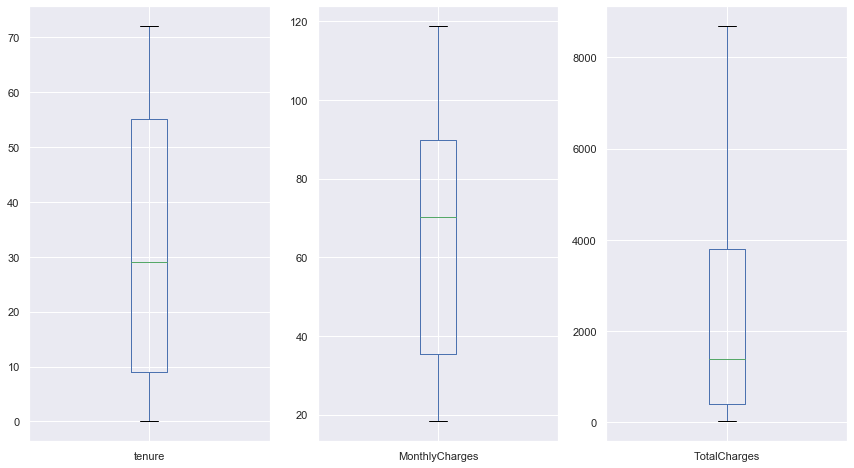

In [18]:
col = ["tenure", "MonthlyCharges", "TotalCharges"]

sns.set(style = "darkgrid")
fig = plt.figure(figsize = (25,8))

for i in range(len(col)):
    plt.subplot(1, 5, i+1)
    df.boxplot(column=[col[i]])

We can see that we have no outliers for this data. So, we can continue the next steps.

## 7. Standardize Data

I am standardizing the data, because I found that in several columns the value of numerical data quite too far with categorical data. Then, in this case, standardizing the data is needed.

In [19]:
scaler = StandardScaler()

In [20]:
scaled = scaler.fit_transform(df.drop(['Churn'], axis=1))
scaled

array([[ 1.00955867, -1.00955867,  1.38171215, ...,  0.8297975 ,
        -1.16032292, -0.99419409],
       [-0.99053183,  0.99053183,  1.38171215, ..., -1.20511329,
        -0.25962894, -0.17373982],
       [-0.99053183,  0.99053183,  1.38171215, ...,  0.8297975 ,
        -0.36266036, -0.95964911],
       ...,
       [ 1.00955867, -1.00955867,  1.38171215, ...,  0.8297975 ,
        -1.1686319 , -0.85451414],
       [-0.99053183,  0.99053183, -0.72373975, ...,  0.8297975 ,
         0.32033821, -0.87209546],
       [-0.99053183,  0.99053183, -0.72373975, ...,  0.8297975 ,
         1.35896134,  2.01234407]])

In [21]:
scaled_df = pd.DataFrame(scaled, columns=df.drop('Churn', axis=1).columns)
scaled_df

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
0,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.160323,-0.994194
1,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,-1.205113,-0.259629,-0.173740
2,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.362660,-0.959649
3,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,-1.205113,-0.746535,-0.195248
4,1.009559,-1.009559,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.197365,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.829798,0.665992,-0.129180
7039,1.009559,-1.009559,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.829798,1.277533,2.241056
7040,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.168632,-0.854514
7041,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.320338,-0.872095


In [22]:
scaled_df['Churn'] = df['Churn']

In [23]:
scaled_df.head()

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,0.829798,-1.160323,-0.994194,0
1,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.79607,-1.205113,-0.259629,-0.173740,0
2,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,0.829798,-0.362660,-0.959649,1
3,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.79607,-1.205113,-0.746535,-0.195248,0
4,1.009559,-1.009559,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.79607,0.829798,0.197365,-0.940457,1


In [24]:
scaled_df.isnull().sum()

Female                        0
Male                          0
DSL                           0
FiberOptic                    0
NoIntServ                     0
Month-to-month                0
One year                      0
Two year                      0
Bank transfer (automatic)     0
Credit card (automatic)       0
Electronic check              0
Mailed check                  0
SeniorCitizen                 0
Partner                       0
Dependents                    0
tenure                        0
PhoneService                  0
MultipleLines                 0
OnlineSecurity                0
OnlineBackup                  0
DeviceProtection              0
TechSupport                   0
StreamingTV                   0
StreamingMovies               0
PaperlessBilling              0
MonthlyCharges                0
TotalCharges                 11
Churn                         0
dtype: int64

In [25]:
scaled_df = scaled_df.drop(scaled_df[scaled_df.TotalCharges.isnull() == True].index, axis=0)

Don't forget to check the NaN/Null Values for one more time!

In [26]:
scaled_df.isnull().sum()

Female                       0
Male                         0
DSL                          0
FiberOptic                   0
NoIntServ                    0
Month-to-month               0
One year                     0
Two year                     0
Bank transfer (automatic)    0
Credit card (automatic)      0
Electronic check             0
Mailed check                 0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
PhoneService                 0
MultipleLines                0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
PaperlessBilling             0
MonthlyCharges               0
TotalCharges                 0
Churn                        0
dtype: int64

In [27]:
scaled_df

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.160323,-0.994194,0
1,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,-1.205113,-0.259629,-0.173740,0
2,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.362660,-0.959649,1
3,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,-1.205113,-0.746535,-0.195248,0
4,1.009559,-1.009559,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.197365,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.829798,0.665992,-0.129180,0
7039,1.009559,-1.009559,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.829798,1.277533,2.241056,0
7040,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.168632,-0.854514,0
7041,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.320338,-0.872095,1


In [28]:
scaled_df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

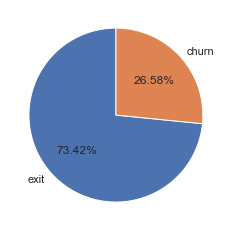

In [29]:
piedata = [len(scaled_df[scaled_df['Churn']==0]), len(scaled_df[scaled_df['Churn']==1])]
labels = ['exit', 'churn']

plt.pie(piedata, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

## 8. Feature Selection

### 8.1. Checking best corr

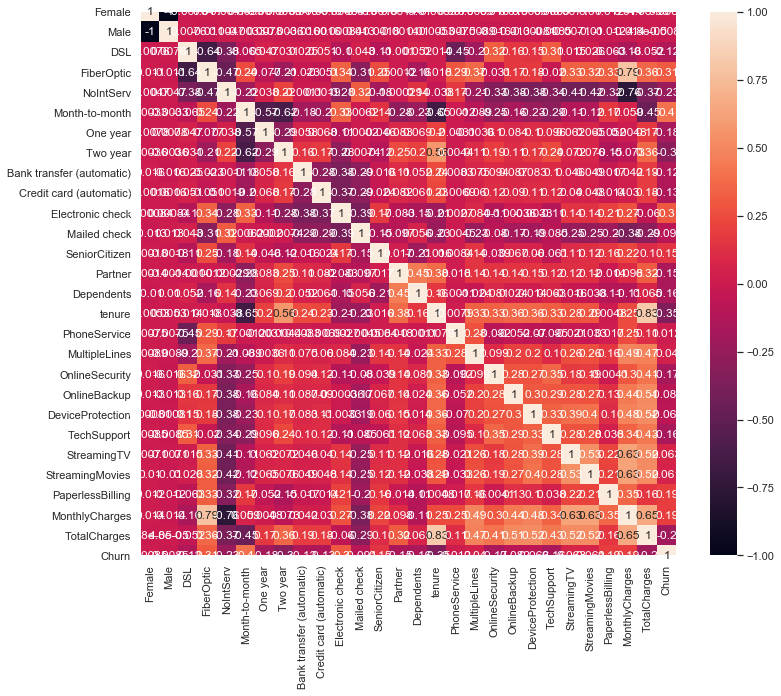

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(scaled_df.corr(), annot=True)

In [31]:
df.corr()['Churn'].sort_values(ascending=False)

Churn                        1.000000
Month-to-month               0.405103
FiberOptic                   0.308020
Electronic check             0.301919
MonthlyCharges               0.193356
PaperlessBilling             0.191825
SeniorCitizen                0.150889
StreamingTV                  0.063228
StreamingMovies              0.061382
MultipleLines                0.040102
PhoneService                 0.011942
Female                       0.008612
Male                        -0.008612
DeviceProtection            -0.066160
OnlineBackup                -0.082255
Mailed check                -0.091683
Bank transfer (automatic)   -0.117937
DSL                         -0.124214
Credit card (automatic)     -0.134302
Partner                     -0.150448
Dependents                  -0.164221
TechSupport                 -0.164674
OnlineSecurity              -0.171226
One year                    -0.177820
TotalCharges                -0.199484
NoIntServ                   -0.227890
Two year    

Features that have big correlation:
* Month-to-month [Contract] (40.45%)
* Tenure (35.40%)
* FiberOptic [InternetServices] (30.74%)
* Two year [Contract] (30.15%)
* Electronic check [PaymentMethod] (30.14%)
* NoIntServ [InternetServices] (22.75%)

### 8.1.2. Checking Initial Feature Importance

To get some preliminary feature importances we will use the Random Forest classifier. I will drop 'Male' column as it already representated with 'Female' column because actualy in original data, it is binary data. Also, I am using the few hyperparameter to get a better model.

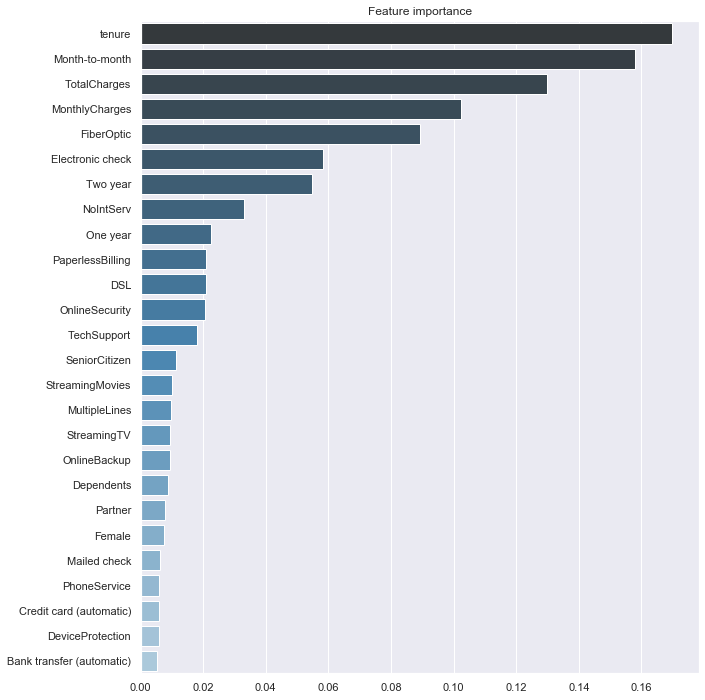

In [32]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

drop = ['Churn', 'Male']
x, y = scaled_df.drop(drop,axis=1), scaled_df['Churn'] == 1

clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

We already found which features that important to influence the decreasing or increasing the prediction. Considering that we have limited feature, thus, I won't do drop any features in this dataset.

## 9. Export Clean Dataset to CSV File

In [33]:
scaled_df.to_csv('Telcom_Cleaned.csv', index=False)

## 10. Import Scaler to Joblib

In [34]:
joblib.dump(scaler, "scalermodel")

['scalermodel']